## Displaying Daily Prices for 2020-2024

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reading the data
daily_data = pd.read_csv('TSLA.csv')
#daily_test = pd.read_csv('TSLA_2024_Data.csv')

In [3]:
# Creating data frames
df_daily_data = pd.DataFrame(daily_data)
print(f"Number of Days for Training Data: {len(df_daily_data)}")

Number of Days for Training Data: 1259


In [4]:
# Checking for missing values in each column
missing_values_daily = df_daily_data.isnull().sum()
print(missing_values_daily)

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


#### No missing values, but we do have missing dates since the dates starts on June 03, 2019 instead of the first. 


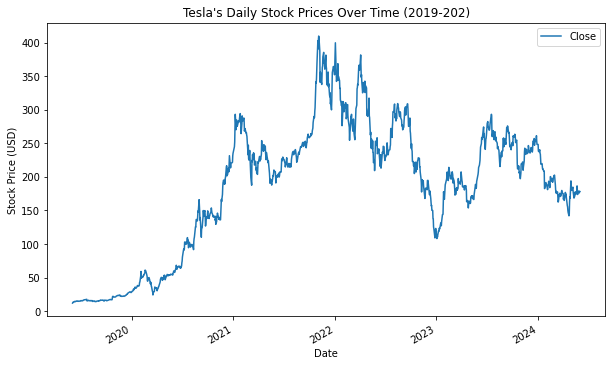

In [5]:
# Convert the 'Date' column to datetime
df_daily_data['Date'] = pd.to_datetime(df_daily_data['Date'])

# Setting the 'Date' column as the index
df_daily_data.set_index('Date', inplace=True)

# Complete date range
custom_start_date = '2019-06-01'
complete_date_range = pd.date_range(start=custom_start_date, end=df_daily_data.index.max(), freq='D')

# Reindex the DataFrame to include all dates in the range
df_reindexed_daily_data = df_daily_data.reindex(complete_date_range)

df_daily_data.plot(y='Close', figsize=(10, 6))
plt.title('Tesla\'s Daily Stock Prices Over Time (2019-202)')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.show()

In [6]:
# Identifying missing dates
missing_dates_daily_data = df_reindexed_daily_data[df_reindexed_daily_data['Close'].isna()].index
print("Missing dates:")
print(missing_dates_daily_data)

Missing dates:
DatetimeIndex(['2019-06-01', '2019-06-02', '2019-06-08', '2019-06-09',
               '2019-06-15', '2019-06-16', '2019-06-22', '2019-06-23',
               '2019-06-29', '2019-06-30',
               ...
               '2024-04-28', '2024-05-04', '2024-05-05', '2024-05-11',
               '2024-05-12', '2024-05-18', '2024-05-19', '2024-05-25',
               '2024-05-26', '2024-05-27'],
              dtype='datetime64[ns]', length=568, freq=None)


#### The missing dates are weekends

## Highlighting Missing Dates

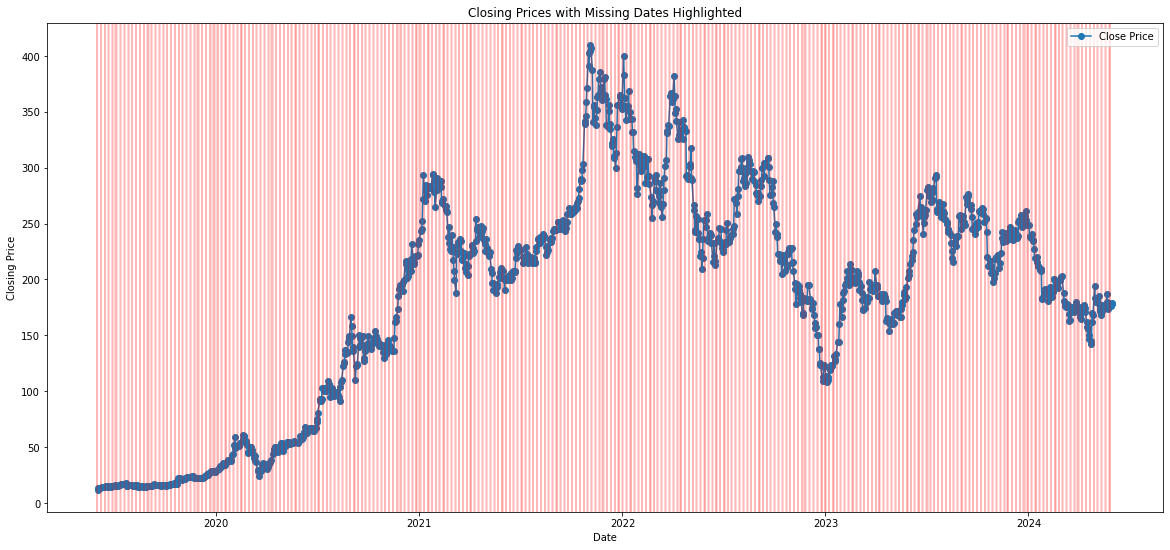

Last recorded date was 2024-05-31 00:00:00
Missing dates in data: 568


In [7]:
# Plotting the data without connecting missing points
plt.figure(figsize=(20, 9))
plt.plot(df_daily_data.index, df_daily_data['Close'], marker='o', linestyle='-', label='Close Price')


# Adding vertical lines for missing dates
for missing_dates in missing_dates_daily_data:
    plt.axvline(x=missing_dates, color='red', linewidth=0.3)
    
plt.title('Closing Prices with Missing Dates Highlighted')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

print(f"Last recorded date was {df_daily_data.index[-1]}")
print(f"Missing dates in data: {len(missing_dates_daily_data)}")

#### checked that the missing dates are just weekends and holidays 

### Filling in the data using backward and forward fill

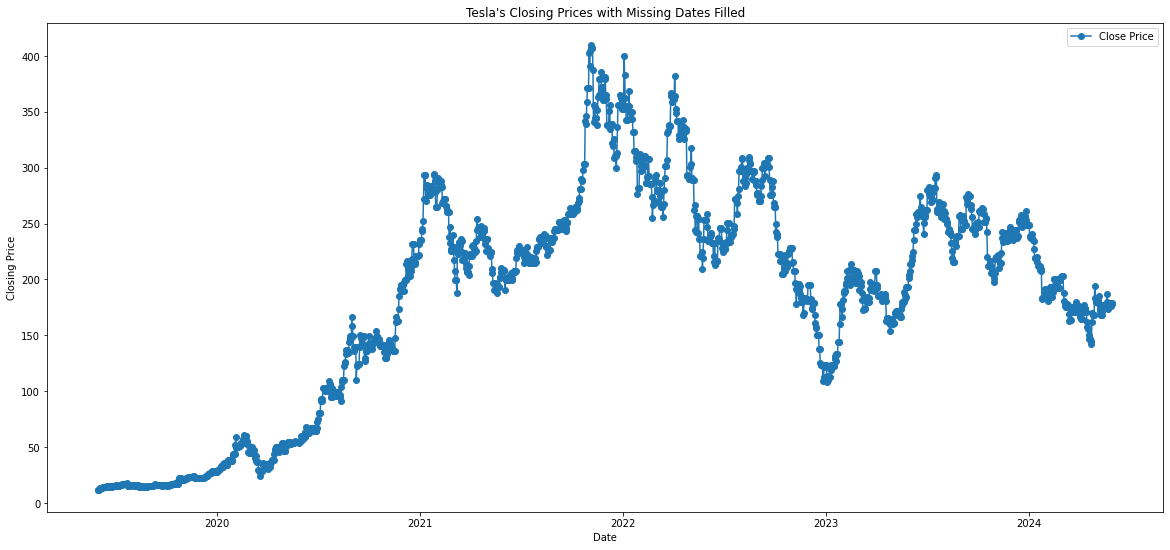

Last recorded date was 2024-05-31 00:00:00
Missing dates after fill: 0


In [11]:
# Perform forward fill to fill the missing data
df_filled_daily_data = df_reindexed_daily_data.fillna(method='ffill')
# Perform backward fill to handle any remaining missing data at the start
df_filled_daily_data = df_filled_daily_data.fillna(method='bfill')

# Extracting the index and the 'Close' column
df_close_only = df_filled_daily_data[['Close']]

# Plot the data without connecting missing points
plt.figure(figsize=(20, 9))
plt.plot(df_filled_daily_data.index, df_filled_daily_data['Close'], marker='o', linestyle='-', label='Close Price')
'''
# Add vertical lines for missing dates
for missing_date in missing_dates_daily_train:
    plt.axvline(x=missing_date, color='red', linewidth=0.3)
'''
plt.title('Tesla\'s Closing Prices with Missing Dates Filled')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

print(f"Last recorded date was {df_filled_daily_data.index[-1]}")
#print(f"Missing dates in data before filling: {len(missing_dates_daily_data)}")

# Check if there are still any missing values
missing_dates_after_fill = df_filled_daily_data[df_filled_daily_data['Close'].isna()].index
print(f"Missing dates after fill: {len(missing_dates_after_fill)}")



#### I performed backward and forward fill to fill in the missing data for the dates that were missing a stock price. The forward fill was esential since the stock price stays the same throughout the weekend and holiday 'til the next business day. The backward fill was to fill in the two dates that were missing at the beginning of the dataset.

In [ ]:
len(df_filled_daily_data)

In [ ]:
len(df_daily_data)

### Saving CSV File 

In [9]:
# Save the DataFrame to a CSV file
df_close_only.to_csv('filled_close_only.csv')
print("DataFrame with only 'Close' column saved to 'filled_close_only.csv'")

DataFrame with only 'Close' column saved to 'filled_close_only.csv'


In [12]:
df_close_only.head

<bound method NDFrame.head of                  Close
2019-06-01   11.931333
2019-06-02   11.931333
2019-06-03   11.931333
2019-06-04   12.906667
2019-06-05   13.106000
...                ...
2024-05-27  179.240005
2024-05-28  176.750000
2024-05-29  176.190002
2024-05-30  178.789993
2024-05-31  178.080002

[1827 rows x 1 columns]>